# Feature selection techniques

As a data scientist or machine learning enthusiast, you know that building an accurate and efficient machine learning model is no small feat. By selecting the most relevant and informative features from your dataset, you can significantly improve the accuracy and efficiency of your model. That's where feature selection comes in. It's one of the several ways to improve your machine learning models, in addition to feature engineering, hyperparameter tuning, regularisation and data preprocessing.

<div>
<img src="Images/Feature%20selection.png" width="770"/>
<div>


**Feature selection** is the process of selecting the most relevant and informative features from your dataset. As the old saying goes, "garbage in, garbage out" - if your dataset contains irrelevant or noisy features, your model's performance will suffer, no matter how good your algorithm or hyperparameters are.

**This notebook covers:**
1. Filter methods
2. Wrapper methods
3. Embedded methods

These are applied to the breast cancer dataset - however a different dataset can also be used. 

## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LassoCV
from xgboost import plot_importance
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

### Read data and pre-process (Breast Cancer Dataset)

In [3]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Create a dataframe with the data and column names
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the dataframe
df['target'] = data.target

# Prepare input features and target
X = df.drop(columns=['target'])
y = df['target']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,0.2500,0.7574,1.5730,21.47,0.002838,0.015920,0.017800,0.005828,0.01329,0.001976,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,0.1639,1.1400,1.2230,14.66,0.005919,0.032700,0.049570,0.010380,0.01208,0.004076,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,0.5462,1.5110,4.7950,49.45,0.009976,0.052440,0.052780,0.015800,0.02653,0.005444,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,0.1942,0.9086,1.4930,15.75,0.005298,0.015870,0.023210,0.008420,0.01853,0.002152,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,0.3460,1.3360,2.0660,31.24,0.005868,0.020990,0.020210,0.009064,0.02087,0.002583,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.1680,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,0.3060,1.6570,2.1550,20.62,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,0.2208,0.9533,1.6020,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [4]:
y_train

149    1
124    1
421    1
195    1
545    1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 398, dtype: int32

### 

# Fit base model

## Linear Regression

In [5]:
def fit_linear_reg(X_train, y_train, X_test, y_test):
    """
    Fits a linear regression model on the training data and evaluates it on the test data using mean squared error (MSE),
    root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2).

    Args:
    - X_train (numpy.ndarray): The training data features.
    - y_train (numpy.ndarray): The training data target.
    - X_test (numpy.ndarray): The test data features.
    - y_test (numpy.ndarray): The test data target.

    Returns:
    - None: The function prints the MSE, RMSE, MAE, and R2 values to the console.
    """

    # Instantiate a linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)

    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)

    return model

In [6]:
linear_reg = fit_linear_reg(X_train, y_train, X_test, y_test)

Mean Squared Error: 0.06728376859363108
Root Mean Squared Error: 0.2593911497981978
Mean Absolute Error: 0.2000734821735751
R-squared: 0.7108399944964188


## XGBoost

In [7]:
def fit_xgb_reg(X_train, y_train, X_test, y_test):
    """
    Fits an XGBoost model on the training data and evaluates it on the test data using mean squared error (MSE),
    root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2). It also extracts the feature
    importances.

    Args:
    - X_train (numpy.ndarray): The training data features.
    - y_train (numpy.ndarray): The training data target.
    - X_test (numpy.ndarray): The test data features.
    - y_test (numpy.ndarray): The test data target.

    Returns:
    - None: The function prints the MSE, RMSE, MAE, and R2 values to the console, and plots the feature importances.
    """

    # Instantiate an XGBoost model with default hyperparameters
    xgb_reg = xgb.XGBRegressor()

    # Train the model on the training data
    xgb_reg.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_reg.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)

    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)

    # Extract the feature importances and create a dataframe
    importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_reg.feature_importances_})

    # Sort the features by importance
    importances = importances.sort_values('Importance', ascending=True)

    return xgb_reg, importances

In [8]:
xgb_reg, importances = fit_xgb_reg(X_train, y_train, X_test, y_test)

Mean Squared Error: 0.0415410371019996
Root Mean Squared Error: 0.20381618459288162
Mean Absolute Error: 0.0734668535853884
R-squared: 0.821472447692597


## Define function to plot feature importances
We will use this in the below techniques

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_importances(df_in, title):
  """make a horizontal bar chart of feature importances"""

  # Plot the feature importances in sorted order
  # Set plot style
  plt.style.use('seaborn-darkgrid')

  # Create horizontal bar plot
  sns.set_style('whitegrid')
  cmap = sns.color_palette('rocket_r', as_cmap=True)
  fig, ax = plt.subplots(figsize=(7, 9))
  sns.barplot(x='Importance', y='Feature', data=df_in, orient='h')
  ax.set_title(title, fontsize=16)
  ax.set_xlabel('Importance Scores', fontsize=12)
  ax.set_ylabel('Features', fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=12)
  ax.invert_yaxis()
  plt.show()
  

C:\Users\hjurz\AppData\Local\Temp\ipykernel_21712\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


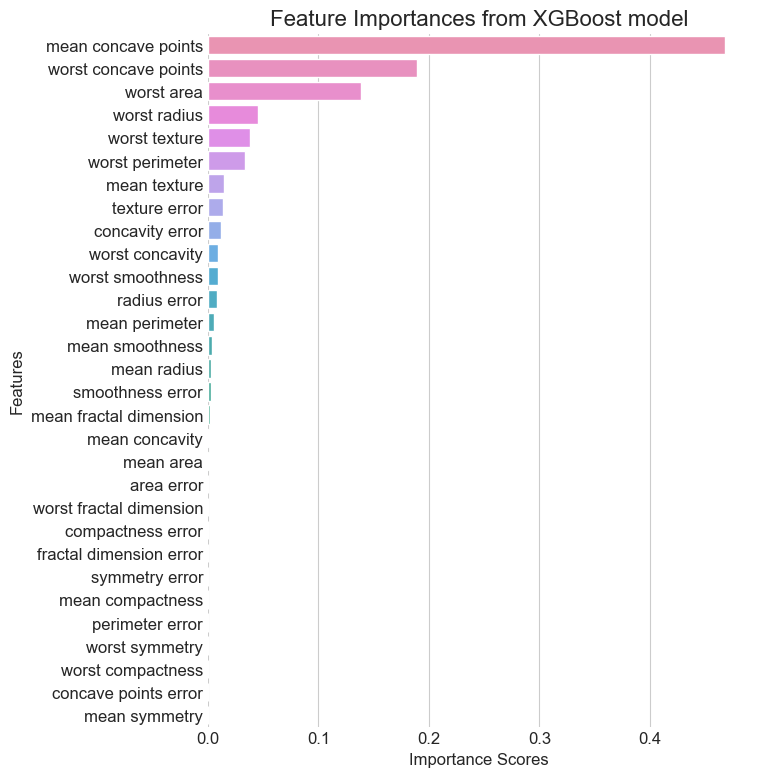

In [10]:
plot_importances(importances, 'Feature Importances from XGBoost model')

# 1. Filter methods

<div>
<img src="Images/Filter%20methods.png" width="770"/>
<div>

## Pearson correlation

Pearson correlation feature selection measures the linear relationship between features and the target variable. This technique is useful for identifying important features in regression problems where the target variable is continuous. The correlation coefficient is used to measure the strength and direction of the linear relationship. However, Pearson correlation assumes a linear relationship and may miss non-linear relationships or complex interactions between features.

**Pros:**
- Measures the linear relationship between features and the target variable
- Can identify both positive and negative correlations
- Relatively easy to interpret and explain

**Cons:**
- Assumes a linear relationship between features and the target variable
- May miss non-linear relationships between features and the target variable
- Does not capture complex interactions between features

Selected features: ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']


C:\Users\hjurz\AppData\Local\Temp\ipykernel_21712\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


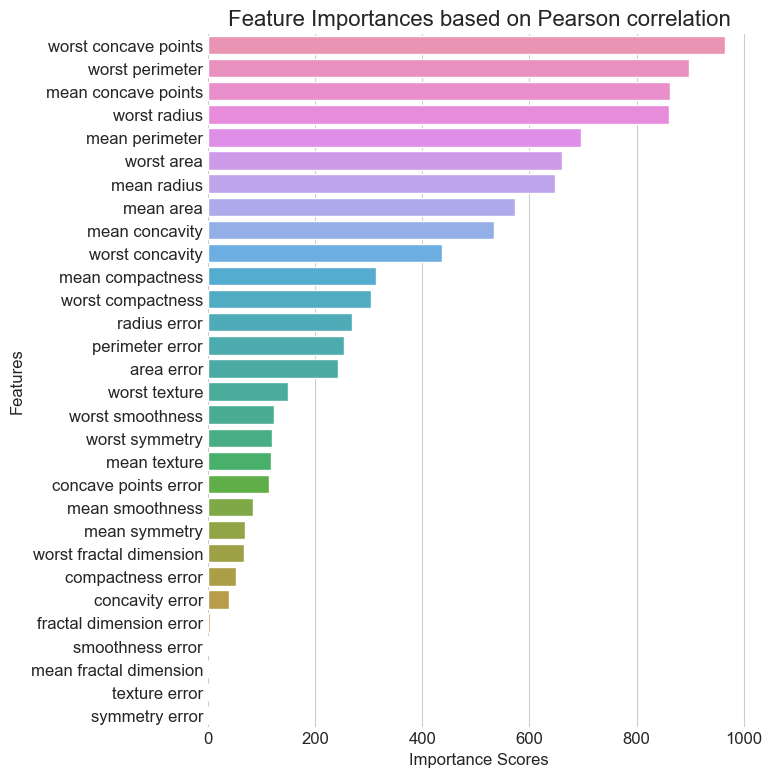

,mean perimeter,mean concave points,worst radius,worst perimeter,worst concave points
149,88.12,0.01329,15.34,97.19,0.06019
124,86.10,0.02800,14.26,91.99,0.08978
421,98.22,0.06300,16.46,114.10,0.11080
195,82.53,0.02377,13.88,90.81,0.08235
545,87.19,0.02443,15.35,97.58,0.07174


In [11]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply Pearson correlation feature selection to select the top two features
selector = SelectKBest(f_regression, k=5)
X_filter = selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
df_filter = X_train.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}

# Create a dataframe and sort
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)

print("Selected features:", new_features)
plot_importances(feature_importances, 'Feature Importances based on Pearson correlation')
df_filter.head()


## Chi-squared

C:\Users\hjurz\AppData\Local\Temp\ipykernel_21712\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


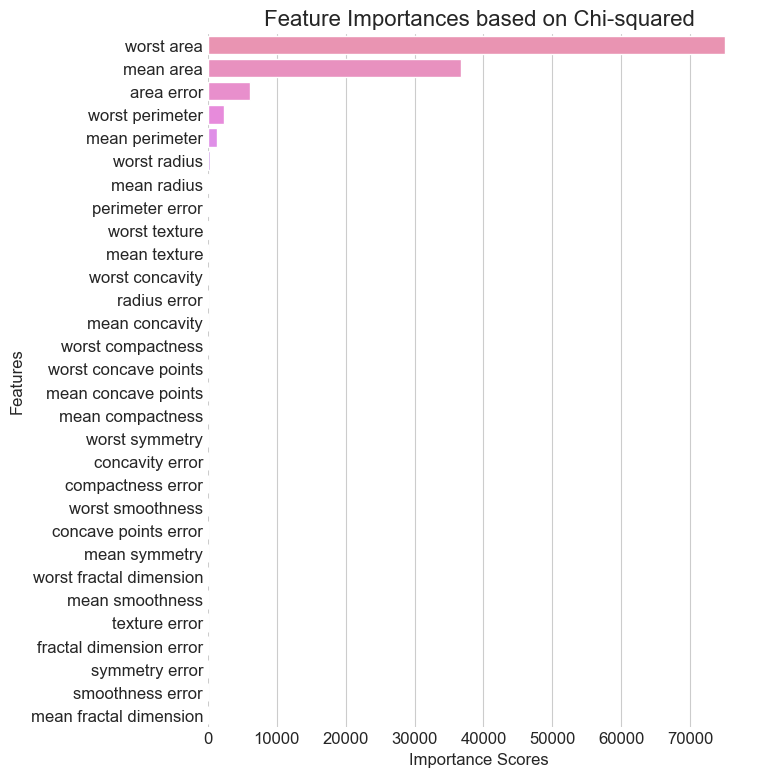

Selected features: ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']


,mean perimeter,mean area,area error,worst perimeter,worst area
149,88.12,585.0,21.47,97.19,725.9
124,86.10,553.5,14.66,91.99,632.1
421,98.22,656.1,49.45,114.10,809.2
195,82.53,516.4,15.75,90.81,600.6
545,87.19,573.2,31.24,97.58,729.8


In [12]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-squared feature selection to select the top five features
selector = SelectKBest(chi2, k=5)
X_filter = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
df_filter = X_train.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}

# Create a dataframe and sort
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)

plot_importances(feature_importances, 'Feature Importances based on Chi-squared')

print("Selected features:", new_features)
df_filter.head()

## ANOVA

C:\Users\hjurz\AppData\Local\Temp\ipykernel_21712\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


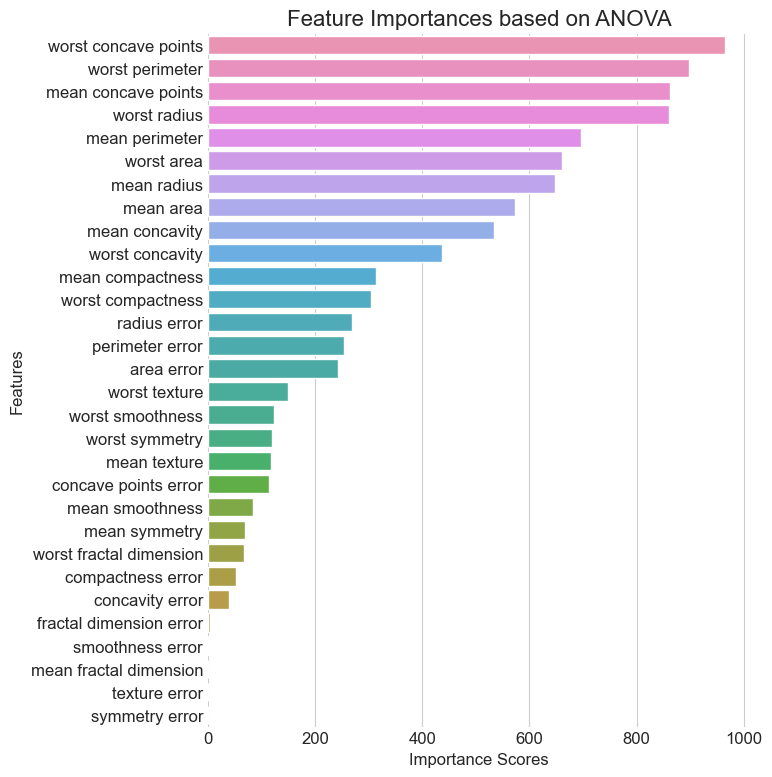

Selected features: ['worst perimeter', 'worst concave points']
Selected features: ['worst perimeter', 'worst concave points']


,worst perimeter,worst concave points
149,97.19,0.06019
124,91.99,0.08978
421,114.10,0.11080
195,90.81,0.08235
545,97.58,0.07174


In [13]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply ANOVA F-test feature selection to select the top two features
selector = SelectKBest(f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
mask = selector.get_support()

# Make dataframe with new features
df_filter = X_train.loc[:,mask]
new_features = X_train.loc[:,mask].columns.tolist()

# Get the feature importances
scores = selector.scores_
feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}

# Create a dataframe and sort
feature_importances = pd.DataFrame(feature_importances.items(), columns=['Feature', 'Importance'])\
    .sort_values('Importance', ascending=True)

plot_importances(feature_importances, 'Feature Importances based on ANOVA')

print("Selected features:", new_features)
df_filter.head()

print("Selected features:", new_features)
df_filter.head()

# 2. Wrapper methods

<div>
<img src="Images/Wrapper%20methods.png" width="770"/>
<div>

## Recursive feature elimination (RFE)

c:\Users\hjurz\.conda\envs\env_tree\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hjurz\.conda\envs\env_tree\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Selected features:
Index(['mean concavity', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')


C:\Users\hjurz\AppData\Local\Temp\ipykernel_21712\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


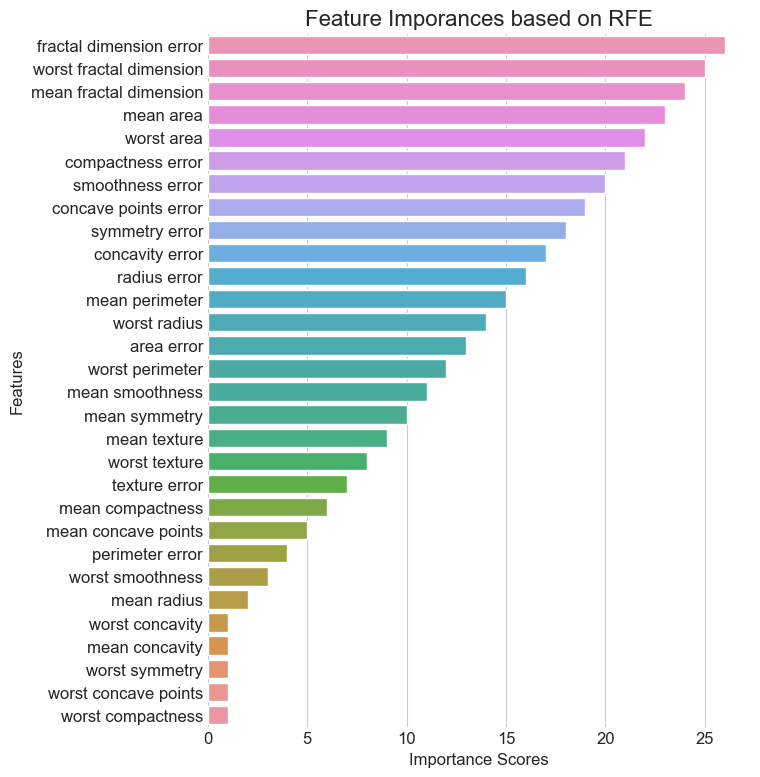

,mean concavity,worst compactness,worst concavity,worst concave points,worst symmetry
149,0.02881,0.18240,0.15640,0.06019,0.2350
124,0.08092,0.25310,0.33080,0.08978,0.2048
421,0.14500,0.36350,0.32190,0.11080,0.2827
195,0.03873,0.15060,0.17640,0.08235,0.3024
545,0.02974,0.15170,0.10490,0.07174,0.2642
...,...,...,...,...,...
71,0.08606,0.24360,0.14340,0.04786,0.2254
106,0.07070,0.26600,0.28730,0.12180,0.2806
270,0.00725,0.05036,0.03866,0.03333,0.2458
435,0.11260,0.35680,0.40690,0.18270,0.3179


In [14]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


# Create a model object 
# model = LogisticRegression(max_iter=1000) # Logistic regression
model = LogisticRegression(max_iter=1000) # XGBoost

# Create a Recursive Feature Elimination object
rfe = RFE(estimator=model, n_features_to_select=5, step=1)

# Fit the RFE object to the data
rfe.fit(X_train, y_train.values.ravel())

# Filter the dataset for the selected features
X_filter = X_train.iloc[:,rfe.support_]
selected_features = X_train.columns[rfe.support_]

# Create a dataframe of the filtered dataset
X_wrap_rfe = pd.DataFrame(X_filter, columns=selected_features)

# Print the selected features
print('Selected features:')
print(selected_features)

# Create a dataframe of feature importances
df_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfe.ranking_})
df_importance = df_importance.sort_values(by='Importance', ascending=True)

plot_importances(df_importance, 'Feature Imporances based on RFE')

# Show the filtered dataset
X_wrap_rfe

## Sequential feature selection (SFS)

Selected features:
Index(['mean concavity', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')


C:\Users\hjurz\AppData\Local\Temp\ipykernel_11780\400142375.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


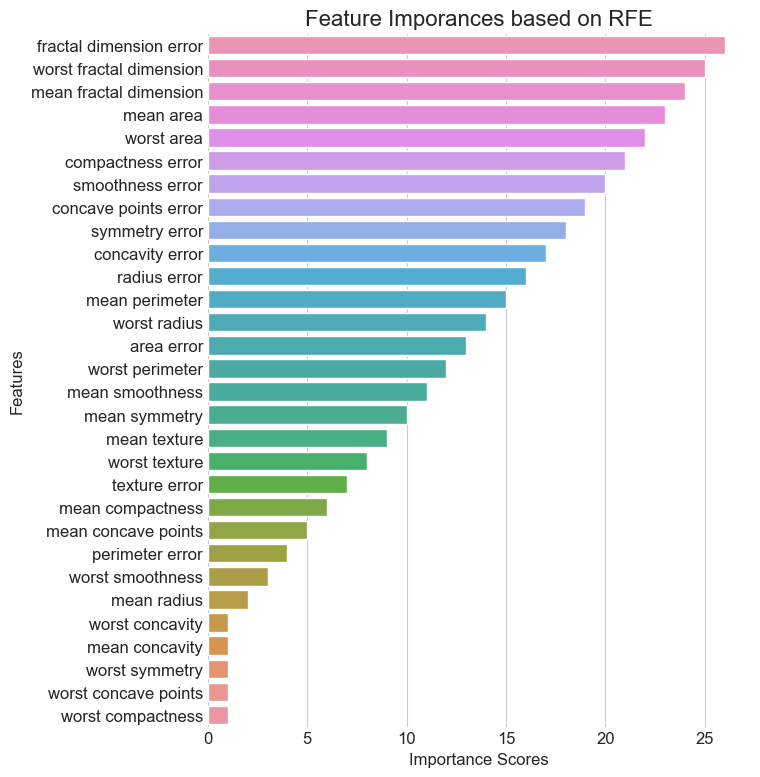

,mean concavity,worst compactness,worst concavity,worst concave points,worst symmetry
149,0.02881,0.18240,0.15640,0.06019,0.2350
124,0.08092,0.25310,0.33080,0.08978,0.2048
421,0.14500,0.36350,0.32190,0.11080,0.2827
195,0.03873,0.15060,0.17640,0.08235,0.3024
545,0.02974,0.15170,0.10490,0.07174,0.2642
...,...,...,...,...,...
71,0.08606,0.24360,0.14340,0.04786,0.2254
106,0.07070,0.26600,0.28730,0.12180,0.2806
270,0.00725,0.05036,0.03866,0.03333,0.2458
435,0.11260,0.35680,0.40690,0.18270,0.3179


In [214]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Create a model object 
# model = LogisticRegression(max_iter=1000) # Logistic regression
model = LogisticRegression(max_iter=1000) # XGBoost

# Create a Sequential Feature Selector object
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=5, direction='forward')

# Fit the SFS object to the data
sfs.fit(X_train, y_train.values.ravel())

# Filter the dataset for the selected features
X_filter = X_train.iloc[:,rfe.support_]
selected_features = X_train.columns[rfe.support_]

# Create a dataframe of the filtered dataset
X_wrap_sfs = pd.DataFrame(X_filter, columns=selected_features)

# Print the selected features
print('Selected features:')
print(selected_features)

# Create a dataframe of feature importances
df_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfe.ranking_})
df_importance = df_importance.sort_values(by='Importance', ascending=True)

plot_importances(df_importance, 'Feature Imporances based on RFE')

X_wrap_sfs

# 3 Embedded methods (Work in Progress)

<div>
<img src="Images/Embedded%20methods.png" width="770"/>
<div>

## Ridge regression

In [219]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeCV

# Create a RidgeCV object
ridge = RidgeCV(cv=5)

# Fit the RidgeCV object to the data
ridge.fit(X_train, y_train.ravel())

# Create a dataframe with the feature coefficients
coef = pd.DataFrame({'Feature': load_breast_cancer().feature_names, 'Coefficient': ridge.coef_})

# Sort the dataframe by coefficient
coef = coef.sort_values('Coefficient', ascending=False)

# Print the selected features
print('Selected features:')
print(coef[coef['Coefficient'] != 0]['Feature'].values.tolist())

Selected features:
['concavity error', 'mean compactness', 'compactness error', 'mean fractal dimension', 'mean radius', 'fractal dimension error', 'mean symmetry', 'texture error', 'worst perimeter', 'mean perimeter', 'area error', 'worst area', 'mean area', 'mean texture', 'perimeter error', 'worst texture', 'worst compactness', 'symmetry error', 'worst fractal dimension', 'worst radius', 'concave points error', 'smoothness error', 'mean smoothness', 'mean concavity', 'worst concavity', 'worst symmetry', 'radius error', 'worst concave points', 'worst smoothness', 'mean concave points']


# Lasso regression

In [220]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LassoCV

# Create a LassoCV object
lasso = LassoCV(cv=5)

# Fit the LassoCV object to the data
lasso.fit(X_train, y_train.ravel())

# Create a dataframe with the feature coefficients
coef = pd.DataFrame({'Feature': load_breast_cancer().feature_names, 'Coefficient': lasso.coef_})

# Sort the dataframe by coefficient
coef = coef.sort_values('Coefficient', ascending=False)

# Print the selected features
print('Selected features:')
print(coef[coef['Coefficient'] != 0]['Feature'].values.tolist())

Selected features:
['worst area', 'mean area', 'worst texture', 'worst perimeter']


# Decision Tree embedded methods

In [188]:
def fit_xgb_reg(X_train, y_train, X_test, y_test):
    """
    Fits an XGBoost model on the training data and evaluates it on the test data using mean squared error (MSE),
    root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2). It also extracts the feature
    importances.

    Args:
    - X_train (numpy.ndarray): The training data features.
    - y_train (numpy.ndarray): The training data target.
    - X_test (numpy.ndarray): The test data features.
    - y_test (numpy.ndarray): The test data target.

    Returns:
    - None: The function prints the MSE, RMSE, MAE, and R2 values to the console, and plots the feature importances.
    """

    # Instantiate an XGBoost model with default hyperparameters
    xgb_reg = xgb.XGBRegressor()

    # Train the model on the training data
    xgb_reg.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_reg.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', rmse)

    # Calculate mean absolute error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)

    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    print('R-squared:', r2)

    # Extract the feature importances and create a dataframe
    importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_reg.feature_importances_})

    # Sort the features by importance
    importances = importances.sort_values('Importance', ascending=True)

    return xgb_reg, importances

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2

# def chi_squared(X_train, y_train):

#     # Apply chi-squared feature selection to select the top five features
#     selector = SelectKBest(chi2, k=5)
#     X_filter = selector.fit_transform(X_train, y_train)

#     # Get the indices of the selected features
#     mask = selector.get_support()

#     # Make dataframe with new features
#     df_filter = X_train.loc[:,mask]
#     new_features = X_train.loc[:,mask].columns.tolist()

#     print("Selected features:", new_features)

    
#     # Get the feature importances
#     scores = selector.scores_
#     feature_importances = {feature_name: score for feature_name, score in zip(X_train.columns, scores)}

#     # Plot the feature importances
#     plt.bar(feature_importances.keys(), feature_importances.values())
#     plt.xticks(rotation=90)
#     plt.title('Feature Importances based on Chi-Squared')
#     plt.xlabel('Features')
#     plt.ylabel('Importance Scores')
#     plt.show()

#     return df_filter

# df_chi = chi_squared(X_train, y_train)

# # Display output
# df_chi.head()

# Regularised generalised linear models